# James Cook University Singapore
# Information Processing and Visualisation

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Read in CSV File

In [ ]:
lottery = pd.read_csv("sales.csv")
lottery.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,4/07/2015,1477969,3829822,278080
1,11/07/2015,1459132,3425039,292275
2,18/07/2015,1515182,3963434,313403
3,25/07/2015,1454695,3792073,273735
4,1/08/2015,1495088,4632792,302424


# Data Management

In [ ]:
# Convert character data to datetime object that can be used in python.
from datetime import datetime
lottery['Week Ending Date'] = pd.to_datetime(lottery["Week Ending Date"], format="%d/%m/%Y")
lottery.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,2015-07-04,1477969,3829822,278080
1,2015-07-11,1459132,3425039,292275
2,2015-07-18,1515182,3963434,313403
3,2015-07-25,1454695,3792073,273735
4,2015-08-01,1495088,4632792,302424


In [ ]:
# Set date as the index of the DataFrame.
lottery.set_index("Week Ending Date", inplace=True)
lottery.head()

,Lotto,Instant,Pulltab
Week Ending Date,,,
2015-07-04,1477969,3829822,278080
2015-07-11,1459132,3425039,292275
2015-07-18,1515182,3963434,313403
2015-07-25,1454695,3792073,273735
2015-08-01,1495088,4632792,302424


In [ ]:
# Create a subset of the data containing only the required variable.
TS = "Pulltab"
sub1 = lottery[[TS]].copy()
sub1.head()

,Pulltab
Week Ending Date,
2015-07-04,278080
2015-07-11,292275
2015-07-18,313403
2015-07-25,273735
2015-08-01,302424


In [ ]:
# Convert time series values to numeric.
sub1[TS] = pd.to_numeric(sub1[TS])
print(sub1.describe())

             Pulltab
count     183.000000
mean   233934.338798
std     66801.865481
min    110805.000000
25%    187110.000000
50%    229280.000000
75%    276428.000000
max    630855.000000


# Visualise Time Series

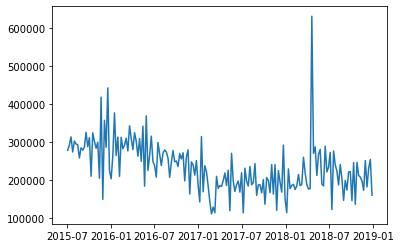

In [ ]:
# Plot the raw lottery data with respect to time.
plt.plot(sub1);

In [ ]:
# Create a new variable storing just the month from the week ending date.
sub1['Month'] = sub1.index.month
sub1.head()

,Pulltab,Month
Week Ending Date,,
2015-07-04,278080,7
2015-07-11,292275,7
2015-07-18,313403,7
2015-07-25,273735,7
2015-08-01,302424,8


# Box plot

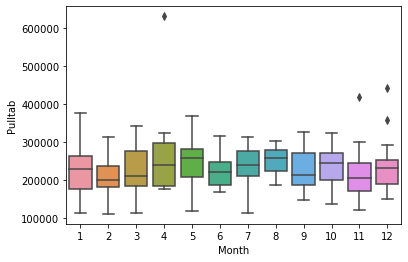

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="Month", y=TS, data=sub1)

In [ ]:
# This box plot shows the distribution of values for each month.
# In a stationary time series, the values for each month should
# not deviate much from the means, but should remain fairly
# constant over time.

# 2. Stationarity  - Check

In [ ]:
 def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)  

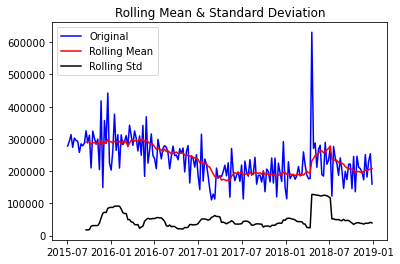

In [ ]:
test_stationarity(sub1[TS])

In [ ]:
# The stationarity test shows that the rolling mean is varying up and down, 
# indicating that this may not be a stationary time series.

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def test_Dickey_Fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
# Perform the Dickey-Fuller test on the time-series.
# Test Statistic: -2.387211
# p-value: 0.145379
# Critical value (1%): -3.467632 > -3.469648
# Critical value (5%): -2.877918 > -2.878799
# The p-value provided by the Dickey-Fuller test is > 0.05, so we accept the null hypothesis, the time-series is non-stationary.
test_Dickey_Fuller(sub1[TS])

Results of Dickey-Fuller Test:
Test Statistic                  -2.387211
p-value                          0.145379
#Lags Used                       4.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


# Make Time Series Stationary

# Decomposing

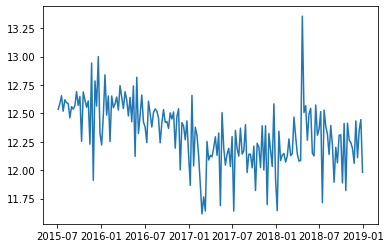

In [ ]:
# Display log time series of Instant lottery data.
# np.log() calculates the natural log of all values entered, these can then be plotted on a graph.
# The log() method is used to stabilize the variance of the time series for future operations.
ts_log = np.log(lottery[TS])
plt.plot(ts_log);

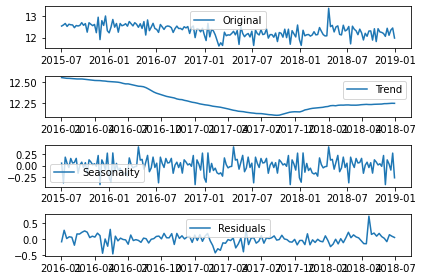

In [ ]:
# Decompose log of data to obtain trend, seasonal, and residual.
# Decomposition of a time series separates its different parts, which helps us to analyze and stationarize it.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

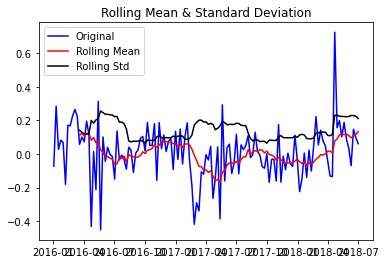

In [ ]:
# Test stationarity of residual of data.
# The residuals of a time series are the difference between the observed and fitted values.
# They are examined to check whether the model has obtained all the information in the data.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
# Perform Dickey-Fuller test on residual.
# Test Statistic: -5.602576
# p-value: 0.000001
# Critical value (1%): -3.482088 > -3.483779
# Critical value (5%): -2.884219 > -2.884954
# The p-value provided by the Dickey-Fuller test is < 0.05, so we reject the null hypothesis; the time-series is stationary.
test_Dickey_Fuller(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                  -5.602576
p-value                          0.000001
#Lags Used                       1.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


# Plot ACF & PACF chart & find optimal parameter

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# Use ACF and PACF to measure the internal correlation of the time-series.
# Autocorrelation is comparing the time series to itself in the past.
# The ACF and PACF functions enable us to determine the parameters for the ARIMA model.
# The data will be lagged by 20 measurements, i.e. Compared to itself 20 points in the past.
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\111\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


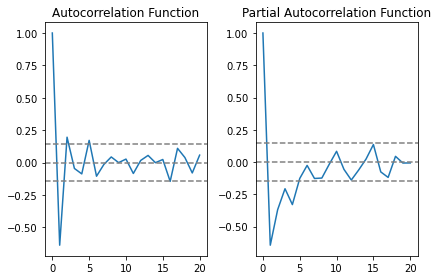

In [ ]:
%matplotlib inline
# Plot ACF.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF.
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Build ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\111\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\111\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT wil

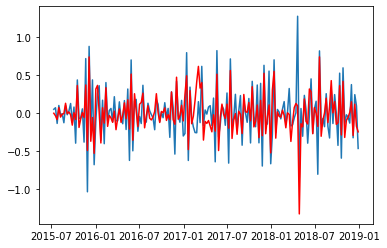

In [ ]:
# Plot ARIMA model of time series.
# The ARIMA model is created by comparing the time series to itself in the past
# using the parameters retrieved from the ACF and PACF.
# This model helps us to predict future values based on past values.
model = ARIMA(ts_log, order=(1, 1, 1))  #(p,d,q)
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red');

# Make predictions

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

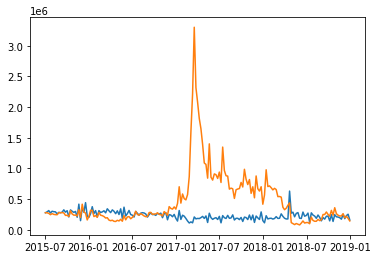

In [ ]:
# Plot of predictions vs actual time series.
# These are the predictions made by the ARIMA model. These are the final product of
# the time series analysis and can be used to assist in making real-world decisions
# about the future.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(lottery[TS])
plt.plot(predictions_ARIMA);